In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from statistics import mean 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sn 

In [2]:
final=pd.read_csv('./final.csv')

# Logistic Regression Model 

The problem we are attempting to solve is predicting the movie’s rating class based on the features above. 

Every movie in the datasets was classified  in one of three basic classes based on its score.
Specifically, if the movie’s score is located in range [0,6) the movie’s respective class is "1" (bad movie). Otherwise, if the movie’s rating is located in range [6,7) the movie’s respective class is "2" (average movie), finally if the movie’s rating is located in range [7,10] the movie’s respective class is "3" (good/very good movie).

The problem belongs in the category of multiclass classification. The algorithm selected is the logistic regression classifier.

The features considered for the modeling are:
'budget','revenue','release_year','runtime','ratingCount_imdb'

From the finalized dataset, we kept all the movies that were produced with a budget over 50,000 dollars. The thought behind was that those movies are more indicative in terms of the overall rating/score that they achieved (Hypotheses).

We assume low to zero collinearity among the selected features.

In [16]:
final[['release_year','revenue','runtime','ratingCount_imdb']].head()
#keep only movies that have valid budget 
final=final[final['budget']>=50000] 
for index,i in final.iterrows():
    if final.loc[index,'score_imdb']<6 :
        final.loc[index,'category']='1'        
    elif final.loc[index,'score_imdb']>=6 and final.loc[index,'score_imdb']<7 :
        final.loc[index,'category']='2'           
    elif final.loc[index,'score_imdb']>=7:
        final.loc[index,'category']='3'  
        
final.groupby(['category']).size()

category
1    1003
2    2013
3    1240
dtype: int64

As we can see above the data are not balanced. As a consequence, the oversampling method is used to create a balanced dataset.

One way to solve the problem of imbalanced dataset is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. This is a type of data augmentation for tabular data and can be very effective.
Perhaps the most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short. This technique was described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled “SMOTE: Synthetic Minority Over-sampling Technique.”

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

SMOTE technique is used in our examined problem as mentioned below.

In [17]:
from imblearn.over_sampling import SMOTE
# generate balanced dataset
X = final[['budget','revenue','release_year','runtime','ratingCount_imdb']]
y = final['category'] 
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)
X_sm, y_sm = smote.fit_sample(X_sm, y_sm)


In [34]:
tmp=pd.DataFrame(y_sm)
tmp.groupby(['category']).size()

category
1    2013
2    2013
3    2013
dtype: int64

Then we divide the dataset in 2 distinct subgroups, the training set and the test set. The training set contains 80% of the dataset and the test set 20% of the dataset.   

The training set is used for training the logistic regression model, while the test set is used to evaluate our model.

In [28]:
# split data into training and testing set after shuffling the dataset
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state=9)

In [29]:
len(X_test)

1208

In [35]:
len(X_train)

4831

Then, we train our model by using the training set 

In [31]:
# Train your model using training set
model = LogisticRegression()
model.fit( X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

For the evaluation of our model is accuracy metric is used both for the training and test set. As it is presented below our classifier predicts correctly 52.4% of the cases in testing set and 54.7% of cases in training set.

In [32]:
print("Accuracy of Testing set :",model.score(X_test, y_test))

Accuracy of Testing set : 0.5248344370860927


In [33]:
print("Accuracy of Training set :",model.score(X_train, y_train))

Accuracy of Training set : 0.5470916994411095


In [26]:
# predict values of test set 
y_pred=model.predict(X_test)
# generate Confusion Matrix 
cm = confusion_matrix(y_test,y_pred)
cm 

array([[215, 115,  95],
       [115,  97, 178],
       [ 13,  58, 322]])

Text(69.0, 0.5, 'Truth')

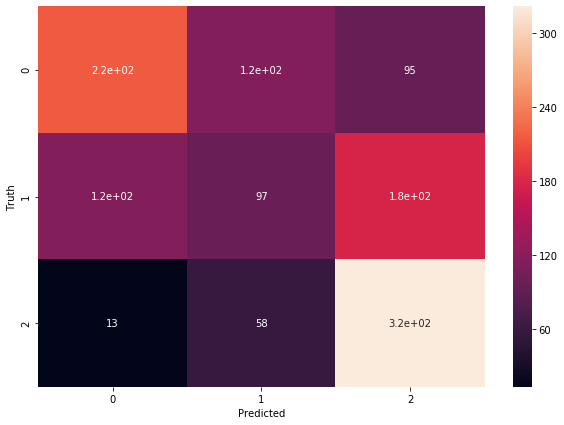

In [27]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

The heatmap presented is constructed with the methodology described below.

Every (i,j) element of the map is the number of times the model predicted that the movie’s class was j (1,2,3) and the real class of the said movie was i (1,2,3). So, the diagonal elements of the sum of the diagonal elements of the map represents the overall accurate predictions of the model when evaluated on the test set. The non-diagonal elements of the matrix represent the overall fault predictions of the model on the test set. 

Given that the overall accuracy of our model is a little bit higher than 50% means that this classifier is not the oprimal one and that we should do some further investigation.
However, this model can be used as a baseline model. 

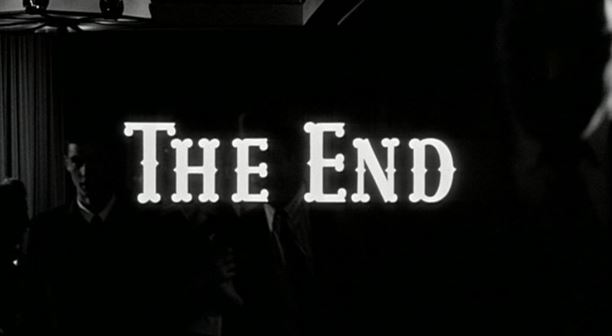

In [3]:
from IPython.display import Image
Image(filename='./Figures/end.jpg')